# Plot Histogram of Coverage of Kerkouene Individuals

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
### Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

from python.run_qpadm import get_meta_ind_table

compute-e-16-233.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 28
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


# 1) Load the Data

In [2]:
vrs = "49.2"

df = get_meta_ind_table(path_ind = f"./eigenstrat/anc_only.v{vrs}_outgroups.ind",
                        path_anno = f"/n/groups/reich/hringbauer/Data/v{vrs}.anno.csv",
                        min_snp = 0)



dft = df[df["loc"].str.contains("Kerkouene")]

covs = dft["avg_cov_snp"].values.astype("float")

### Some Coverage Stats
n_snps = 3e4
n = np.sum(dft["n_cov_snp"]>n_snps)
print(f"{n} Samples with Coverage > {n_snps}")

Filtering to 1137/1142
Loaded 1137 Individuals
Filtered to 1137 Individuals based on #SNP covered> 0
Filtered to 1047 Individuals based on duplicates.
27 Samples with Coverage > 30000.0


# Make the Histogram with the coverage

In [3]:
bins = np.linspace(0,7,15)

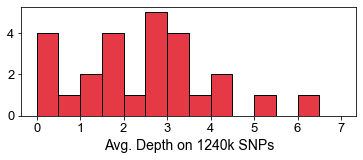

In [13]:
savepath = ""

plt.figure(figsize=(6,2))
ax = plt.gca()
ax.hist(covs, ec="k", bins = bins, color="#e63946")
ax.set_xlabel("Avg. Depth on 1240k SNPs", fontsize=14)
ax.tick_params(axis='both', labelsize=13)


if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0)
    print(f"Saved to {savepath}")  
plt.show()

# Area 51

In [15]:
len(dft)

27